## Домашняя работа 2. Пономарев Александр

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

## Kobe Bryant  shot selection

Cсылка на соревнование: https://www.kaggle.com/c/kobe-bryant-shot-selection

Goal: Fun and education

Using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

In [3]:
raw_data = pd.read_csv('data/Kobe.csv')

In [4]:
raw_data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [5]:
target = 'shot_made_flag'

**Задания:**

1. Провести анализ данных. Много хороших примеров анализа можно посмотреть здесь https://www.kaggle.com/c/kobe-bryant-shot-selection/kernels
2. Подготовить фичи для обучения модели - нагенерить признаков, обработать пропущенные значения, проверить на возможные выбросы, обработать категориальные признаки и др.
3. Обучить линейную модель, Lasso, Ridge на тех же признаках - построить сравнительную таблицу коэффициентов, сделать заключения о том, как меняется величина коэффициентов, какие зануляются. Посчитать RSS

**Дополнительно**
4. Сравнить результаты на тестовом наборе данных - сделать train_test_split в самом начале, подготовить переменные, сравнить результаты работы классификаторов (те же 3), метрика ROC AUC

### Решение

1. Разделим данные на две выборки, тестовая и обучающая
2. Рассмотрим группы переменных и проанализируем, что из них пригодится для анализа, избавимся от категориальных переменных
3. Обучение моделей
4. Сравнение эффективности на тестовых данных

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [7]:
print(f'Unique shot ids len: {len(raw_data.shot_id.unique())}')

Unique shot ids len: 30697


Из описания данных мы видим, что наша целевая переменная 'shot_made_flag' не всегда известна, поэтому придется урезать нашу выборку, выбросив все броски, результат которых не известен.

In [8]:
not_null_raw_data = raw_data[pd.notnull(raw_data['shot_made_flag'])]
not_null_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 25 columns):
action_type           25697 non-null object
combined_shot_type    25697 non-null object
game_event_id         25697 non-null int64
game_id               25697 non-null int64
lat                   25697 non-null float64
loc_x                 25697 non-null int64
loc_y                 25697 non-null int64
lon                   25697 non-null float64
minutes_remaining     25697 non-null int64
period                25697 non-null int64
playoffs              25697 non-null int64
season                25697 non-null object
seconds_remaining     25697 non-null int64
shot_distance         25697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             25697 non-null object
shot_zone_area        25697 non-null object
shot_zone_basic       25697 non-null object
shot_zone_range       25697 non-null object
team_id               25697 non-null int64
team_name         

Для обработки категориальных данных будем использовать метод WOE

In [9]:
def get_woe_v1(df_train, df_test, col, target_col):
    all_good = len(df_train[df_train[target_col] == 1][col])
    all_bad = len(df_train[df_train[target_col] == 0][col])
    odds_series = (
        df_train[df_train[target_col] == 1][col].value_counts()
        /
        df_train[df_train[target_col] == 0][col].value_counts()
    )
    odds_series = odds_series / all_good * all_bad
    category_woe_dict = np.log(odds_series).to_dict()
    df_train[col + '_woe'] = df_train[col].apply(category_woe_dict.get)
    df_test[col + '_woe'] = df_test[col].apply(category_woe_dict.get)
    return df_train, df_test

Функция для удаления лишних колонок

In [10]:
def drop_column(df_train, df_test, col):
    df_train.drop(col, axis=1, inplace=True)
    df_test.drop(col, axis=1, inplace=True)
    return df_train, df_test

Функция для one-hot encoding категориальных данных, которая пригодится нам далее

In [11]:
def one_hot_column(df_train, df_test, col, indx_col):
    one_hotted_train = pd.get_dummies(df_train[[indx_col, col]]).set_index(indx_col)
    one_hotted_test = pd.get_dummies(df_test[[indx_col, col]]).set_index(indx_col)
    
    not_created = list(set(one_hotted_train.columns) - set(one_hotted_test.columns))
    
    if len(not_created) > 0:
        for col in not_created:
            one_hotted_test[col] = 0
    df_train = df_train.join(one_hotted_train, on=indx_col)
    df_test = df_test.join(one_hotted_test, on=indx_col)
    
    df_train, df_test = drop_column(df_train=df_train, df_test=df_test, col=col)
    return df_train, df_test

#### Разделим данные на тренировочную и обучающие выборки

In [73]:
train_sample, test_sample = train_test_split(not_null_raw_data, test_size=0.2, random_state=23)

In [74]:
print(f'Train sample len {train_sample.shape[0]}. Test sample len {test_sample.shape[0]}')

Train sample len 20557. Test sample len 5140


#### Рассмотрим переменные action_type,  combined_shot_type, shot_type

In [75]:
print(f'Unique action types: {train_sample.action_type.unique()}')
print(f'Unique combined shot types: {train_sample.combined_shot_type.unique()}')
print(f'Unique shot types: {train_sample.shot_type.unique()}')

Unique action types: ['Jump Shot' 'Layup Shot' 'Fadeaway Jump Shot' 'Running Jump Shot'
 'Tip Shot' 'Slam Dunk Shot' 'Turnaround Jump Shot' 'Driving Layup Shot'
 'Dunk Shot' 'Reverse Layup Shot' 'Step Back Jump shot' 'Pullup Jump shot'
 'Driving Jump shot' 'Driving Dunk Shot' 'Floating Jump shot'
 'Driving Reverse Layup Shot' 'Jump Bank Shot' 'Running Bank shot'
 'Driving Slam Dunk Shot' 'Turnaround Fadeaway shot' 'Alley Oop Dunk Shot'
 'Turnaround Bank shot' 'Hook Shot' 'Reverse Dunk Shot' 'Finger Roll Shot'
 'Alley Oop Layup shot' 'Reverse Slam Dunk Shot' 'Fadeaway Bank shot'
 'Driving Finger Roll Shot' 'Pullup Bank shot' 'Turnaround Hook Shot'
 'Running Hook Shot' 'Hook Bank Shot' 'Driving Finger Roll Layup Shot'
 'Running Finger Roll Layup Shot' 'Finger Roll Layup Shot'
 'Running Layup Shot' 'Turnaround Finger Roll Shot' 'Running Dunk Shot'
 'Tip Layup Shot' 'Driving Hook Shot' 'Jump Hook Shot'
 'Putback Layup Shot' 'Running Pull-Up Jump Shot'
 'Driving Floating Jump Shot' 'Running

Так как action_types, combined_shot_types обладает достаточно большим набором уникальных значений, применим к ним метод woe, чтобы не раздувать размерность наших данных

In [76]:
for col in ('action_type', 'combined_shot_type'):
    train_sample, test_sample = get_woe_v1(
        df_train=train_sample,
        df_test=test_sample,
        col=col,
        target_col='shot_made_flag'
    )
    drop_column(train_sample, test_sample, col)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

In [77]:
train_sample[['action_type_woe', 'combined_shot_type_woe']].head()

,action_type_woe,combined_shot_type_woe
1954,-0.499639,-0.226320
610,-0.499639,-0.226320
6303,-0.499639,-0.226320
5511,-0.257554,0.473742
20618,0.463590,-0.226320


In [78]:
# train_sample.where(~train_sample['action_type_woe'].notnull(), 0, inplace=True)
nan_action_woe = ~train_sample['action_type_woe'].notnull()
train_sample['action_type_woe'][nan_action_woe] = 0

nan_action_woe = ~test_sample['action_type_woe'].notnull()
test_sample['action_type_woe'][nan_action_woe] = 0

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global

Для параметра shot_type применим метод one hot encoding, т.к. уникальных значений всего два, 

In [79]:
train_sample, test_sample = one_hot_column(
    df_train=train_sample,
    df_test=test_sample,
    col='shot_type',
    indx_col='shot_id'
)

In [80]:
test_sample[['shot_type_2PT Field Goal', 'shot_type_3PT Field Goal']].head(10)

,shot_type_2PT Field Goal,shot_type_3PT Field Goal
10913,0,1
14878,1,0
28107,1,0
14858,0,1
11807,0,1
21850,1,0
16744,1,0
5555,1,0
6243,1,0
11184,1,0


### Рассмотрим game_event_id, game_id

Параметр game_event_id, судя по всему, означает уникальный идентификатор конкретной игры. Так как он не несет никакой информации в реальном мире - удалим эту колонку.

In [81]:
train_sample, test_sample = drop_column(df_train=train_sample, df_test=test_sample, col='game_event_id')
train_sample, test_sample = drop_column(df_train=train_sample, df_test=test_sample, col='game_id')

#### Рассмотрим позиционные параметры lat, lon, loc_x, loc_y

In [82]:
train_sample[['loc_x', 'loc_y', 'lat', 'lon']].head(10)

,loc_x,loc_y,lat,lon
1954,51,184,33.8603,-118.2188
610,47,236,33.8083,-118.2228
6303,118,137,33.9073,-118.1518
5511,0,0,34.0443,-118.2698
20618,-82,71,33.9733,-118.3518
15792,0,0,34.0443,-118.2698
29581,-139,72,33.9723,-118.4088
23920,-31,16,34.0283,-118.3008
4185,71,31,34.0133,-118.1988
16005,-51,91,33.9533,-118.3208


In [83]:
train_sample[['loc_x', 'loc_y', 'lat', 'lon']].describe()

,loc_x,loc_y,lat,lon
count,20557.000000,20557.000000,20557.000000,20557.000000
mean,7.404193,91.482755,33.952817,-118.262396
std,110.183649,87.818776,0.087819,0.110184
min,-248.000000,-44.000000,33.253300,-118.517800
25%,-67.000000,4.000000,33.884300,-118.336800
50%,0.000000,74.000000,33.970300,-118.269800
75%,95.000000,160.000000,34.040300,-118.174800
max,248.000000,791.000000,34.088300,-118.021800


Визуализируем переменные на графике

Text(0.5,1,'lat and lon')

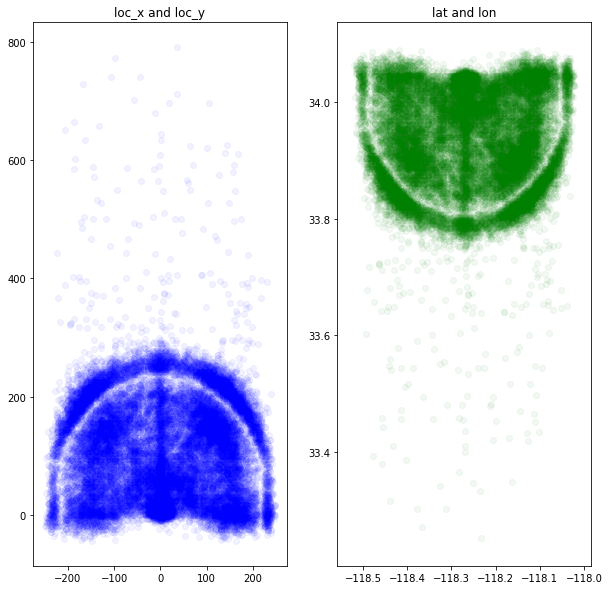

In [84]:
alpha = 0.05
plt.figure(figsize=(10,10))

# loc_x and loc_y
plt.subplot(121)
plt.scatter(raw_data.loc_x, raw_data.loc_y, color='blue', alpha=alpha)
plt.title('loc_x and loc_y')

# lat and lon
plt.subplot(122)
plt.scatter(raw_data.lon, raw_data.lat, color='green', alpha=alpha)
plt.title('lat and lon')

Параметры loc_x, loc_y - определенно говорят о позиции игрока в момент броска.
С помощью параметров loc_x, loc_y поссчитаем растояние от кольца - distance, а так же угол, по отношению к кольцу, с которого был осуществлен бросок - angle.

Переменные lat, lng уберем из данных, так как с помощью loc_x, loc_y можно полностью смоделировать бросок и положение игрока

In [85]:
def add_distance_and_angle(df):
    df['distance'] = df[['loc_x', 'loc_y']]\
        .apply(lambda row: np.sqrt(row['loc_x']**2 + row['loc_y']**2), axis=1)
    
    df['angle'] = df[['loc_x', 'loc_y']]\
        .apply(lambda row: np.arctan(row['loc_y'] / row['loc_x']) if row['loc_x'] != 0 else np.pi / 2, axis=1)
    return df


train_sample = add_distance_and_angle(train_sample)
test_sample = add_distance_and_angle(test_sample)

Так как теперь мы имеем дистанцию, с которой выполнялся бросок, а так же угол, остальные позиционные координаты можно отбросить, так как, вероятнее всего, они будут являться линейной комбинацией дистанции и угла.

In [86]:
for col in ('loc_x', 'loc_y', 'lat', 'lon', 'shot_distance', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range'):
    train_sample, test_sample = drop_column(train_sample, test_sample, col)

#### Далее, рассмотрим matchup, opponent, team_name, team_id

team_id - данная меременная говорит нам об идентификаторе команды, который присваивается каждой команде

In [87]:
train_sample['team_id'].value_counts()

1610612747    20557
Name: team_id, dtype: int64

In [88]:
train_sample['team_name'].value_counts()

Los Angeles Lakers    20557
Name: team_name, dtype: int64

Как мы можем наблюдать, Коби играл все время в одной команде, поэтому такие переменные, как matchup, team_name, team_id можно смело удалить. Очтавим только переменную opponent, так как она характеризует противника. Для кодирования данной переменной так же используем woe, чтобы не увелиивать размерность наших дланных

In [89]:
for col in ('matchup', 'team_name', 'team_id'):
    train_sample, test_sample = drop_column(train_sample, test_sample, col)

In [90]:
train_sample, test_sample = get_woe_v1(
    df_test=test_sample,
    df_train=train_sample,
    col='opponent',
    target_col='shot_made_flag'
)
train_sample, test_sample = drop_column(df_test=test_sample, df_train=train_sample, col='opponent')

#### Далее рассмотрим переменные, связанные со временем

Можно выделить две группы переменных:
1. Характеризует время во время матча (minutes_remaining, period, seconds_remaining)
2. Характеризует текущую дату (season, game_date) 

Группу номер 1 можно обхединить в одну переменную - кол-во секунд с начала матча, что позволит сократить размерность.
Из группы номер 2 можно оставить только переменную game_date, так как season - это просто годы, в который проводился игровой сезон.

In [91]:
def estimate_seconds_from_match_start(df_train, df_test):
    MIN_IN_PERIOD = 12
    df_train['seconds_from_match_start'] = (df_train['period'] - 1) * MIN_IN_PERIOD * 60 \
        + (MIN_IN_PERIOD * 60 - df_train['minutes_remaining'] * 60 - df_train['seconds_remaining'])
    
    df_test['seconds_from_match_start'] = (df_test['period'] - 1) * MIN_IN_PERIOD * 60 \
        + (MIN_IN_PERIOD * 60 - df_test['minutes_remaining'] * 60 - df_test['seconds_remaining'])
    
    return df_train, df_test

train_sample, test_sample = estimate_seconds_from_match_start(df_train=train_sample, df_test=test_sample)

In [92]:
for col in ('minutes_remaining', 'period', 'seconds_remaining', 'season'):
    train_sample, test_sample = drop_column(df_test=test_sample, df_train=train_sample, col=col)

In [93]:
import datetime
import time

train_sample['game_date_timestamp'] = train_sample.apply(
    lambda row: time.mktime(datetime.datetime.strptime(row['game_date'], '%Y-%m-%d').timetuple()),
    axis=1
)

test_sample['game_date_timestamp'] = test_sample.apply(
    lambda row: time.mktime(datetime.datetime.strptime(row['game_date'], '%Y-%m-%d').timetuple()),
    axis=1
)

train_sample, test_sample = drop_column(df_test=test_sample, df_train=train_sample, col='game_date')

#### Рассмотрим переменную playoffs

In [94]:
train_sample['playoffs'].unique()

array([0, 1])

Данная переменная символизируется собой игру в плей-офф.

In [95]:
train_sample.head()

,playoffs,shot_made_flag,shot_id,action_type_woe,combined_shot_type_woe,shot_type_2PT Field Goal,shot_type_3PT Field Goal,distance,angle,opponent_woe,seconds_from_match_start,game_date_timestamp
1954,0,0.0,1955,-0.499639,-0.226320,1,0,190.937162,1.300410,-0.038085,1295,1.009228e+09
610,0,0.0,611,-0.499639,-0.226320,0,1,240.634578,1.374216,-0.078513,766,9.771732e+08
6303,0,1.0,6304,-0.499639,-0.226320,1,0,180.812057,0.859771,0.031841,1252,1.100034e+09
5511,0,0.0,5512,-0.257554,0.473742,1,0,0.000000,1.570796,0.038292,2606,1.073164e+09
20618,0,1.0,20619,0.463590,-0.226320,1,0,108.466585,-0.713626,0.004084,2157,1.361995e+09


In [96]:
train_sample, test_sample = drop_column(df_test=test_sample, df_train=train_sample, col='shot_id')
print('drop shot_id')

drop shot_id


### Данные готовы. Теперь приступим к обучению моделей

In [97]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sk_metrics

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [98]:
train_shot_made_flag = train_sample['shot_made_flag'].copy()
test_shot_made_flag = test_sample['shot_made_flag'].copy()

train_sample, test_sample = drop_column(df_test=test_sample, df_train=train_sample, col='shot_made_flag')
test_sample.head()

,playoffs,action_type_woe,combined_shot_type_woe,shot_type_2PT Field Goal,shot_type_3PT Field Goal,distance,angle,opponent_woe,seconds_from_match_start,game_date_timestamp
10913,0,-0.499639,-0.226320,0,1,286.020978,0.735934,-0.038085,2623,1.173388e+09
14878,0,-0.499639,-0.226320,1,0,183.087411,1.063167,0.038292,1749,1.256591e+09
28107,1,-0.257554,0.473742,1,0,0.000000,1.570796,0.031589,2007,1.209154e+09
14858,0,-0.499639,-0.226320,0,1,254.578082,1.361075,-0.047190,1740,1.239653e+09
11807,0,-0.499639,-0.226320,0,1,233.683547,-0.120109,0.004084,184,1.196716e+09


In [181]:
def draw_roc_auc(train_actual_vals, train_predictions, test_actual_vals, test_predictions, model_name):
    '''
    Draw roc auc rate
    '''
    roc_auc_train = np.round(sk_metrics.roc_auc_score(train_actual_vals, train_predictions), 5)
    roc_auc_test = np.round(sk_metrics.roc_auc_score(test_actual_vals, test_predictions), 5)

    fpr_train, tpr_train, thresholds_train = sk_metrics.roc_curve(train_actual_vals, train_predictions)
    fpr_test, tpr_test, thresholds_test = sk_metrics.roc_curve(test_actual_vals, test_predictions)
    
    matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
    plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model_name, size=16)
    plt.legend(loc='lower right')
    plt.show()

#### Linear regression

In [100]:
lin_reg = LinearRegression()
lin_reg.fit(train_sample, train_shot_made_flag)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
# on train sample
linear_predictions_for_train = lin_reg.predict(train_sample)
linear_predictions_for_test = lin_reg.predict(test_sample)

In [102]:
linear_roc_auc_train = np.round(sk_metrics.roc_auc_score(train_shot_made_flag, linear_predictions_for_train), 5)
linear_auc_test = np.round(sk_metrics.roc_auc_score(test_shot_made_flag, linear_predictions_for_test), 5)

print(f'AUC for train {linear_roc_auc_train}')
print(f'AUC for test {linear_auc_test}')

AUC for train 0.68533
AUC for test 0.68705


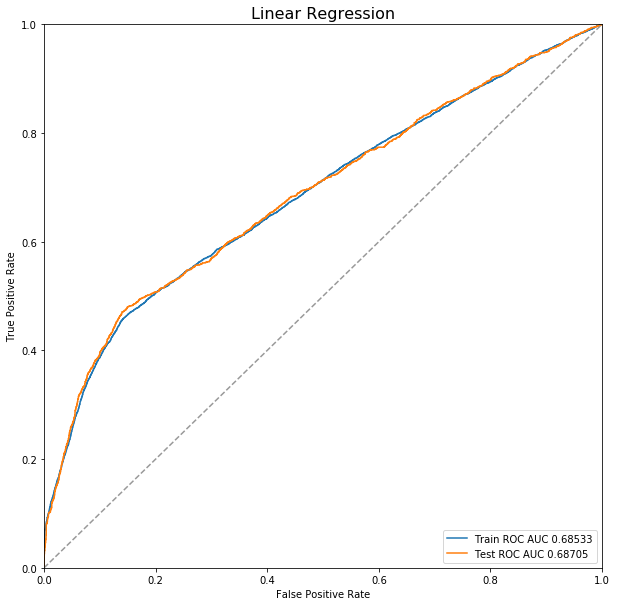

In [182]:
draw_roc_auc(
    train_actual_vals=train_shot_made_flag,
    train_predictions=linear_predictions_for_train,
    test_actual_vals=test_shot_made_flag,
    test_predictions=linear_predictions_for_test,
    model_name='Linear Regression'
)

Судя по всему, результат предсказания довольно средний.

In [107]:
#create coeffs matrix
coeffs_matrix = np.full((1,10), np.array(train_sample.columns))
coeffs_matrix = np.vstack([coeffs_matrix, lin_reg.coef_])

##### подсчитаем RSS
$$RSS = \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p \beta_j * x_{ij})^2$$
т.к. $\sum_{j=1}^p \beta_j * x_{ij} = \bar {y_i}$, то

In [109]:
linear_rss = sum(test_shot_made_flag - linear_predictions_for_test)**2
linear_rss

355.32329095205563

#### Lasso

In [159]:
from sklearn.linear_model import Lasso
lasso_alpha = 0.00001
lassoreg = Lasso(alpha=linear_alpha)
lassoreg.fit(train_sample, train_shot_made_flag)

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [156]:
lasso_train_prediction = lassoreg.predict(train_sample)
lasso_test_prediction = lassoreg.predict(test_sample)

In [177]:
lasso_roc_auc_train = np.round(sk_metrics.roc_auc_score(train_shot_made_flag, lasso_train_prediction), 5)
lasso_auc_test = np.round(sk_metrics.roc_auc_score(test_shot_made_flag, lasso_test_prediction), 5)

print(f'AUC for train {lasso_roc_auc_train}')
print(f'AUC for test {lasso_auc_test}')

AUC for train 0.68532
AUC for test 0.68709


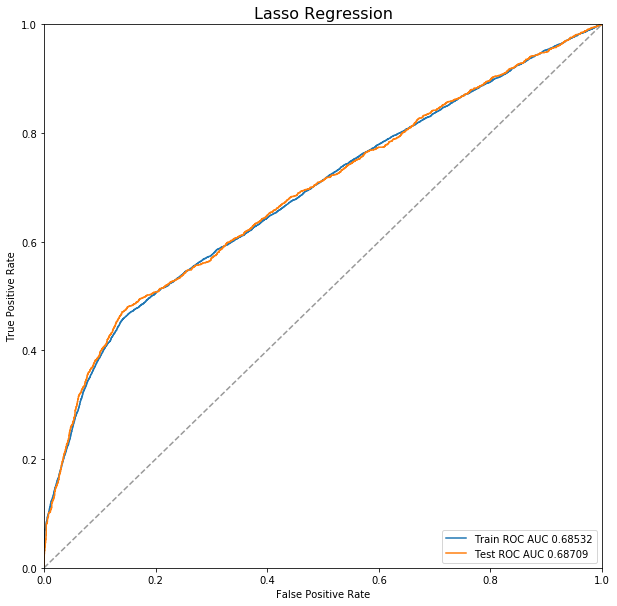

In [185]:
draw_roc_auc(
    train_actual_vals=train_shot_made_flag,
    train_predictions=lasso_train_prediction,
    test_actual_vals=test_shot_made_flag,
    test_predictions=lasso_test_prediction,
    model_name='Lasso Regression'
)


In [120]:
coeffs_matrix = np.vstack([coeffs_matrix, lassoreg.coef_])

###### Подсчитаем RSS
$$RSS = \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p \beta_j * x_{ij})^2 + \lambda \sum_{j=1}^p |\beta_j|$$

In [178]:
lasso_rss = sum(test_shot_made_flag - linear_predictions_for_test)**2 + lasso_alpha * sum(abs(lassoreg.coef_))
lasso_rss

355.3232953585971

#### Ridge

In [124]:
from sklearn.linear_model import Ridge
ridge_alpha = 0.00001
ridgereg = Ridge(alpha=ridge_alpha)
ridgereg.fit(train_sample, train_shot_made_flag)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.10171e-26): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [125]:
ridge_train_prediction = ridgereg.predict(train_sample)
ridge_test_prediction = ridgereg.predict(test_sample)

In [176]:
ridge_roc_auc_train = np.round(sk_metrics.roc_auc_score(train_shot_made_flag, ridge_train_prediction), 5)
ridge_auc_test = np.round(sk_metrics.roc_auc_score(test_shot_made_flag, ridge_test_prediction), 5)

print(f'AUC for train {ridge_roc_auc_train}')
print(f'AUC for test {ridge_auc_test}')

AUC for train 0.68533
AUC for test 0.68705


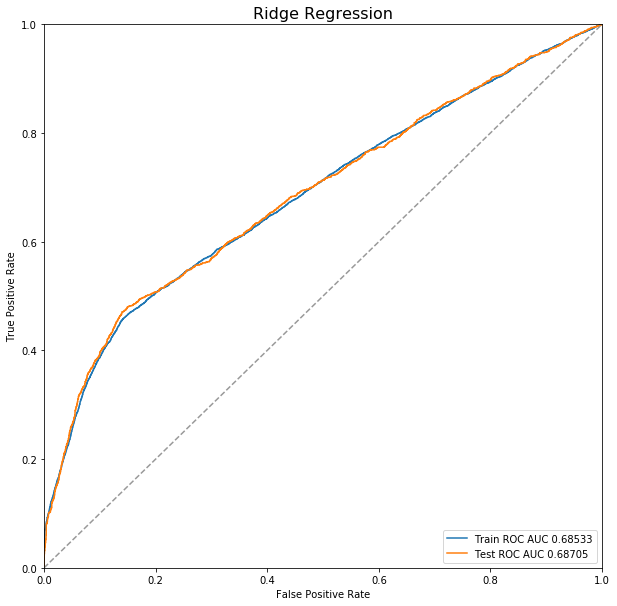

In [184]:
draw_roc_auc(
    train_actual_vals=train_shot_made_flag,
    train_predictions=ridge_train_prediction,
    test_actual_vals=test_shot_made_flag,
    test_predictions=ridge_test_prediction,
    model_name='Ridge Regression'
)

In [128]:
coeffs_matrix = np.vstack([coeffs_matrix, ridgereg.coef_])

##### Подсчитаем RSS
$$RSS = \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p \beta_j * x_{ij})^2 + \lambda \sum_{j=1}^p \beta_j^2$$

In [131]:
ridge_rss = sum(test_shot_made_flag - linear_predictions_for_test)**2 + alpha * sum(ridgereg.coef_ ** 2)
ridge_rss

355.32329165224445

#### Cравнение коэффициентов

###### RSS

In [133]:
print(f'Linear regression RSS {linear_rss}')
print(f'Lasso regression RSS {lasso_rss}')
print(f'Ridge regression RSS {ridge_rss}')

Linear regression RSS 355.32329095205563
Lasso regression RSS 355.3232953585971
Ridge regression RSS 355.32329165224445


In [180]:
print(f'ROC AUC linear test {linear_auc_test}')
print(f'ROC AUC lasso test {lasso_auc_test}')
print(f'ROC AUC ridge test {ridge_auc_test}')

ROC AUC linear test 0.68705
ROC AUC lasso test 0.68709
ROC AUC ridge test 0.68705


##### Коэффициенты построенных регресссий

In [161]:
df = pd.DataFrame(columns=coeffs_matrix[0, 0:], data=coeffs_matrix[1:, 0:])
df.head()

,playoffs,action_type_woe,combined_shot_type_woe,shot_type_2PT Field Goal,shot_type_3PT Field Goal,distance,angle,opponent_woe,seconds_from_match_start,game_date_timestamp
0,0.0027653,0.201193,-0.0609525,0.00506273,-0.00506273,-0.000120517,0.00691886,0.160369,-1.90873e-05,-3.41864e-11
1,0.00267682,0.20115,-0.060878,0.010023,-2.52592e-18,-0.000120848,0.00689843,0.158888,-1.9092e-05,-3.42742e-11
2,0.0027653,0.201193,-0.0609525,0.00506274,-0.00506272,-0.000120517,0.00691886,0.160369,-1.90873e-05,-3.41864e-11


Как мы видим, коэф. при колонках seconds_from_match_start, game_date_timestamp очень велики, это связано с тем, что значения в этих колонках имеют другой порядок и модель пытается занизить их значения. Нормализуем эти значения: 

In [236]:
def normalize(dataset, cols):
    dataNorm = dataset.copy()
    for col in ('seconds_from_match_start', 'game_date_timestamp'):
        dataNorm[col] = ( ( dataset[col] - dataset[col].min() ) / ( dataset[col].max() - dataset[col].min() ) )
    return dataNorm


normalized_vals_train = normalize(train_sample, ('seconds_from_match_start', 'game_date_timestamp'))
normalized_vals_test = normalize(test_sample, ('seconds_from_match_start', 'game_date_timestamp'))

In [237]:
lin_reg = LinearRegression()
lin_reg.fit(normalized_vals_train, train_shot_made_flag)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [239]:
df.loc[3] = lin_reg.coef_
df['model_type'] = ['linear', 'lasso', 'ridge', 'linear_normilized']
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

In [240]:
df.head()

,model_type,playoffs,action_type_woe,combined_shot_type_woe,shot_type_2PT Field Goal,shot_type_3PT Field Goal,distance,angle,opponent_woe,seconds_from_match_start,game_date_timestamp
0,linear,0.0027653,0.201193,-0.0609525,0.00506273,-0.00506273,-0.000120517,0.00691886,0.160369,-1.90873e-05,-3.41864e-11
1,lasso,0.00267682,0.20115,-0.060878,0.010023,-2.52592e-18,-0.000120848,0.00689843,0.158888,-1.9092e-05,-3.42742e-11
2,ridge,0.0027653,0.201193,-0.0609525,0.00506274,-0.00506272,-0.000120517,0.00691886,0.160369,-1.90873e-05,-3.41864e-11
3,linear_normilized,0.0027653,0.201193,-0.0609525,0.00506273,-0.00506273,-0.000120517,0.00691886,0.160369,-0.0958182,-0.0209684


In [242]:
normalized_train_prediction = lin_reg.predict(normalized_vals_train)
normalized_test_prediction = lin_reg.predict(normalized_vals_test)

In [243]:
some_roc_auc_train = np.round(sk_metrics.roc_auc_score(train_shot_made_flag, normalized_train_prediction), 5)
some_auc_test = np.round(sk_metrics.roc_auc_score(test_shot_made_flag, normalized_test_prediction), 5)

print(f'AUC for train {some_roc_auc_train}')
print(f'AUC for test {some_auc_test}')

AUC for train 0.68533
AUC for test 0.6871


Как мы видим, на тренировочной выборке модель стала вести себя несколько лучше: 0.6871 против 0.68705

Проверим, лучше ли отработает Lasso регрессия с учетом нормализации, так как ее тестовый roc_auc был лучшим - 0.6809

In [244]:
lasso_alpha = 0.00001
lassoreg = Lasso(alpha=linear_alpha)
lassoreg.fit(normalized_vals_train, train_shot_made_flag)

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [245]:
some_train_prediction = lassoreg.predict(normalized_vals_train)
some_test_prediction = lassoreg.predict(normalized_vals_test)

In [246]:
some_roc_auc_train = np.round(sk_metrics.roc_auc_score(train_shot_made_flag, some_train_prediction), 5)
some_auc_test = np.round(sk_metrics.roc_auc_score(test_shot_made_flag, some_test_prediction), 5)

print(f'AUC for train {some_roc_auc_train}')
print(f'AUC for test {some_auc_test}')

AUC for train 0.68531
AUC for test 0.68712


In [263]:
df.loc[4, 'model_type'] = 'lasso_normalized'
df.loc[4, 1:] = lassoreg.coef_
df

,model_type,playoffs,action_type_woe,combined_shot_type_woe,shot_type_2PT Field Goal,shot_type_3PT Field Goal,distance,angle,opponent_woe,seconds_from_match_start,game_date_timestamp
0,linear,0.0027653,0.201193,-0.0609525,0.00506273,-0.00506273,-0.000120517,0.00691886,0.160369,-1.90873e-05,-3.41864e-11
1,lasso,0.00267682,0.20115,-0.060878,0.010023,-2.52592e-18,-0.000120848,0.00689843,0.158888,-1.9092e-05,-3.42742e-11
2,ridge,0.0027653,0.201193,-0.0609525,0.00506274,-0.00506272,-0.000120517,0.00691886,0.160369,-1.90873e-05,-3.41864e-11
3,linear_normilized,0.0027653,0.201193,-0.0609525,0.00506273,-0.00506273,-0.000120517,0.00691886,0.160369,-0.0958182,-0.0209684
4,lasso_normalized,0.00268498,0.201143,-0.0608682,0.0100481,-1.18524e-17,-0.000120853,0.00690163,0.158946,-0.0954947,-0.0208462


Ощутимого прироста мы не получили, 0.68712 против 0.6871.
Попробуем в рамках эксперимента произвести forward feature selection

In [390]:
cols = normalized_vals_train.columns.tolist()

best = {'cols': [], 'roc_auc': 0}

for col in cols:
    best['cols'].append(col)

    col_to_drop = set(cols) - set(best['cols'])

    cleared_train_data = normalized_vals_train.drop(
        columns=col_to_drop,
        axis=1
    )
    cleared_test_data = normalized_vals_test.drop(
        columns=col_to_drop,
        axis=1
    )

    lasso_alpha = 0.00001
    lassoreg = Lasso(alpha=linear_alpha)
    lassoreg.fit(cleared_train_data, train_shot_made_flag)

    cleared_train_prediction = lassoreg.predict(cleared_train_data)
    cleared_test_prediction = lassoreg.predict(cleared_test_data)

    cleared_roc_auc_train = sk_metrics.roc_auc_score(train_shot_made_flag, cleared_train_prediction)
    cleared_auc_test = sk_metrics.roc_auc_score(test_shot_made_flag, cleared_test_prediction)

    if (best['roc_auc'] > cleared_auc_test):
        best['cols'].remove(col)
    else:
        best['roc_auc'] = cleared_auc_test


print(f'Selected columns: {best["cols"]}')
print(f'Best roc_auc: {best["roc_auc"]}')

Selected columns: ['playoffs', 'action_type_woe', 'shot_type_2PT Field Goal', 'shot_type_3PT Field Goal', 'angle', 'opponent_woe', 'seconds_from_match_start', 'game_date_timestamp']
Best roc_auc: 0.6910567463685393


**Таким образом, мы добились улучшения roc_auc до $\approx 0.69106$. Наша размерность сократилась до 8 фич.**
Попробуем, так же в рамках эксперимента оставить следующие колонки (методом подбора):

In [394]:
col_to_drop = [
    'shot_type_2PT Field Goal',
    'shot_type_3PT Field Goal',
    'distance',
    'angle',
    'playoffs',
    'opponent_woe'
]

cleared_train_data = normalized_vals_train.drop(
    columns=col_to_drop,
    axis=1
)
cleared_test_data = normalized_vals_test.drop(
    columns=col_to_drop,
    axis=1
)

lasso_alpha = 0.00001
lassoreg = Lasso(alpha=linear_alpha)
lassoreg.fit(cleared_train_data, train_shot_made_flag)

cleared_train_prediction = lassoreg.predict(cleared_train_data)
cleared_test_prediction = lassoreg.predict(cleared_test_data)

cleared_roc_auc_train = np.round(sk_metrics.roc_auc_score(train_shot_made_flag, cleared_train_prediction), 7)
cleared_auc_test = np.round(sk_metrics.roc_auc_score(test_shot_made_flag, cleared_test_prediction), 7)

print(f'AUC for train {cleared_roc_auc_train}')
print(f'AUC for test {cleared_auc_test}')

AUC for train 0.6841834
AUC for test 0.6913456


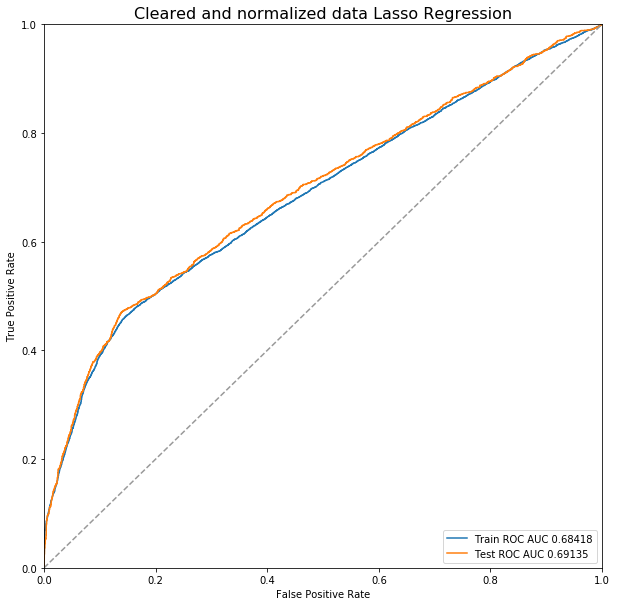

In [386]:
draw_roc_auc(
    train_actual_vals=train_shot_made_flag,
    train_predictions=cleared_train_prediction,
    test_actual_vals=test_shot_made_flag,
    test_predictions=cleared_test_prediction,
    model_name='Cleared and normalized data Lasso Regression'
)

In [393]:
set(normalized_vals_train.columns.tolist()) - set(col_to_drop)

{'action_type_woe',
 'combined_shot_type_woe',
 'game_date_timestamp',
 'seconds_from_match_start'}

**Таким образом, нам удалось улучшить наш классификатор до показателя $\approx$ 0.69135**

А остались колонки:
'action_type_woe',
'combined_shot_type_woe',
'game_date_timestamp',
'seconds_from_match_start'

Спасибо за внимание)